# Explore here

In [29]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

lz_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('Track:', track['name'])
    print()

Track: In the End

Track: Numb

Track: Somewhere I Belong

Track: The Emptiness Machine

Track: What I've Done

Track: Faint

Track: One Step Closer

Track: Crawling

Track: Heavy Is the Crown

Track: Bleed It Out



In [31]:
load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

artist_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

results = spotify.artist_top_tracks(artist_uri)

tracks_data = []
for track in results['tracks']:
    tracks_data.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'album': track['album']['name'],
        'preview_url': track['preview_url'],
        'cover_url': track['album']['images'][0]['url']
    })

df = pd.DataFrame(tracks_data)

df_sorted = df.sort_values(by='popularity', ascending=False)

top3_populares = df_sorted.head(3)

print("Top 3 canciones más populares de Linkin Park")
print(top3_populares[['name', 'album', 'popularity']])



Top 3 canciones más populares de Linkin Park
             name                          album  popularity
0      In the End  Hybrid Theory (Bonus Edition)          89
1            Numb                        Meteora          87
4  What I've Done            Minutes to Midnight          84


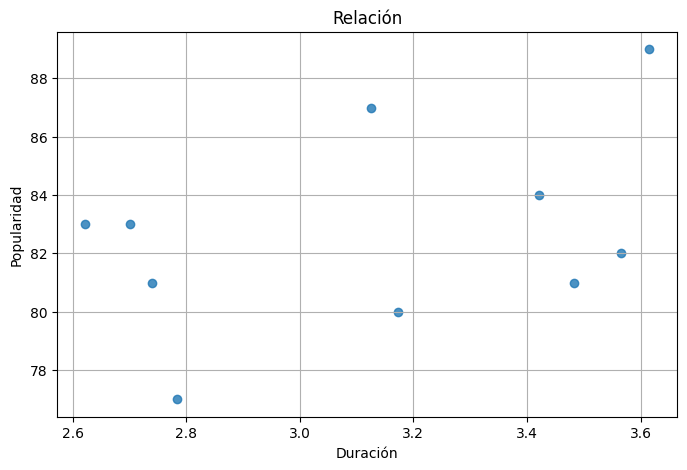

Coeficiente de correlación duración-popularidad: 0.40


In [ ]:
load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

lp_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

results = spotify.artist_top_tracks(lp_uri)

tracks_data = [
    {
        'name': track['name'],
        'duration_ms': track['duration_ms'],
        'popularity': track['popularity']
    }
    for track in results['tracks']
]

df = pd.DataFrame(tracks_data)
df['duration_min'] = df['duration_ms'] / 60000
plt.figure(figsize=(8,5))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.8)
plt.title("Relación entre duración y popularidad")
plt.xlabel("Duración")
plt.ylabel("Popularidad")
plt.grid(True)
plt.show()

corr = df['duration_min'].corr(df['popularity'])
print(f"Coeficiente de correlación duración-popularidad: {corr:.2f}")


In [ ]:
#No encuentro una correlación entre canciones más cortas y populares, es más la canción más popular es la más larga de la lista.